# **DATA ANALYSIS ON DIOMONDS DATASET**

`BY KOMAL BALOCH `\
`EMAIL ADDRESS # Komalbalochhasni@gmail.com`

### **OBJECTIVES**

> The objective of this project is to analyze the diamonds dataset, including exploring its characteristics, preprocessing the data, and building predictive models for regression (predicting diamond prices) The project aims to:
>
>1. Explore the dataset to understand its structure, distributions, and relationships between features.
>2. Preprocess the data by handling missing values, label encoding scaling features if necessary.
>3. Conduct hypothesis testing to identify relationships between features and the target variable (price).
>4. Build multiple regression models to predict diamond prices based on their characteristics.
>5. Evaluate the performance of regression models using appropriate metrics like Root Mean Squared Error (RMSE).
>6. Select the best regression model based on evaluation metrics.
>7. Provide insights and recommendations based on model results and analysis.

##### `The diamonds dataset contains 10 fields. Here's a description:`
`carat'`: The weight of the diamond, measured in carats.\
`cut`: Quality of the cut, categorized as Fair, Good, Very Good, Premium, or Ideal.\
`color`: Color of the diamond, ranging from J (worst) to D (best).\
`clarity`: Clarity of the diamond, ranging from I1 (worst) to IF (best).\
`depth`: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.\
`table`: The width of the diamond's table (the flat top facet) expressed as a percentage of its average diameter.\
`price`: Price of the diamond in US dollars.\
`x`: Length of the diamond in mm.\
`y`: Width of the diamond in mm.\
`z`: Depth of the diamond in mm.

###  **IMPORT NECESSORY LIBRARIES**

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: total: 391 ms
Wall time: 6.2 s


### **LOAD DATASET**

In [2]:
%%time
df = sns.load_dataset('diamonds')

CPU times: total: 0 ns
Wall time: 115 ms


### **VIEW ITS DESCRIPTION**

In [3]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print("Description of the dataset:")
df.describe()

Description of the dataset:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
print("Info of the dataset:")
df.info()

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## **DATA PREPROCESSING**

### **1. CHECKING FOR NULL VALUES**

In [6]:
print("Checking for missing values:\n", df.isnull().sum())

Checking for missing values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


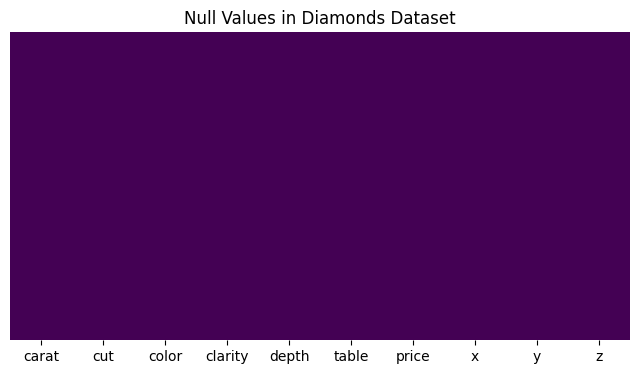

In [7]:
# Plot for null values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cmap='viridis',cbar=False, yticklabels=False)
plt.title('Null Values in Diamonds Dataset')
plt.show()


> There is no null values so we don't need to impute

## **Exploratory Data Analysis**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### **VISUALIZING DISTRIBUTION FOR NUMERICAL VALUES**

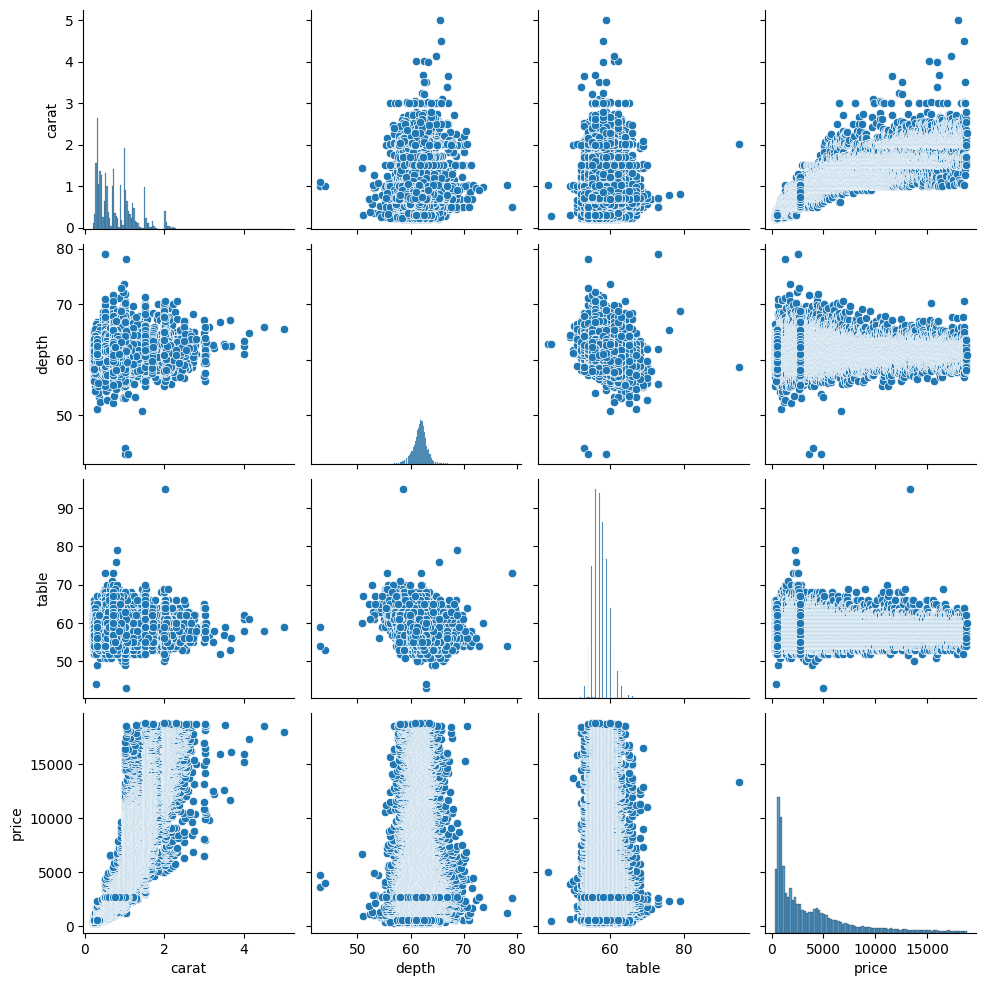

CPU times: total: 1.56 s
Wall time: 5.05 s


In [10]:
%%time
sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.show()

### **VISUALIZING  CATEGORICAL VALUES**

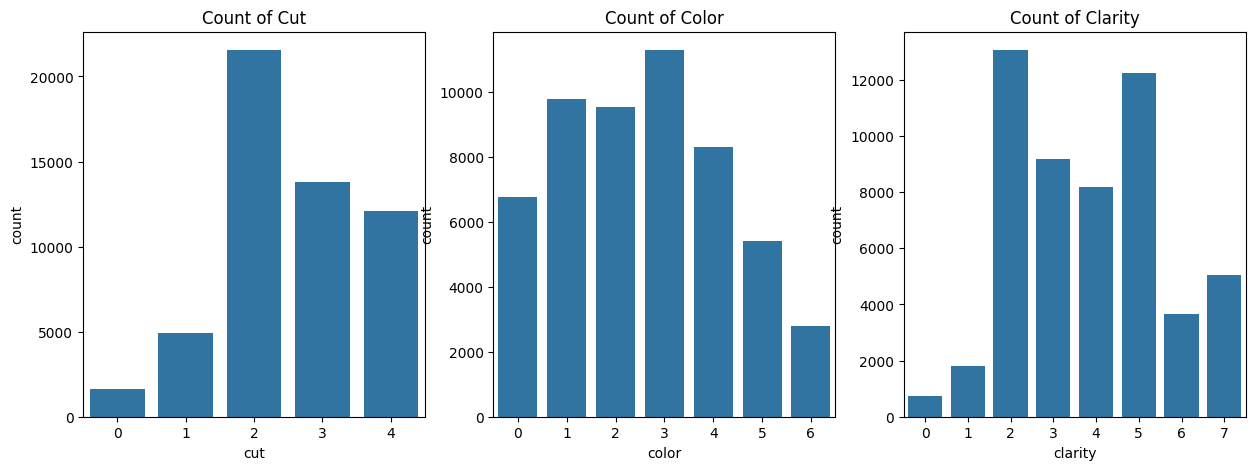

CPU times: total: 172 ms
Wall time: 585 ms


In [11]:
%%time
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='cut', data=df)
plt.title('Count of Cut')
plt.subplot(1, 3, 2)
sns.countplot(x='color', data=df)
plt.title('Count of Color')
plt.subplot(1, 3, 3)
sns.countplot(x='clarity', data=df)
plt.title('Count of Clarity')
plt.show()

## **HYPHOTHESIS TESTING**

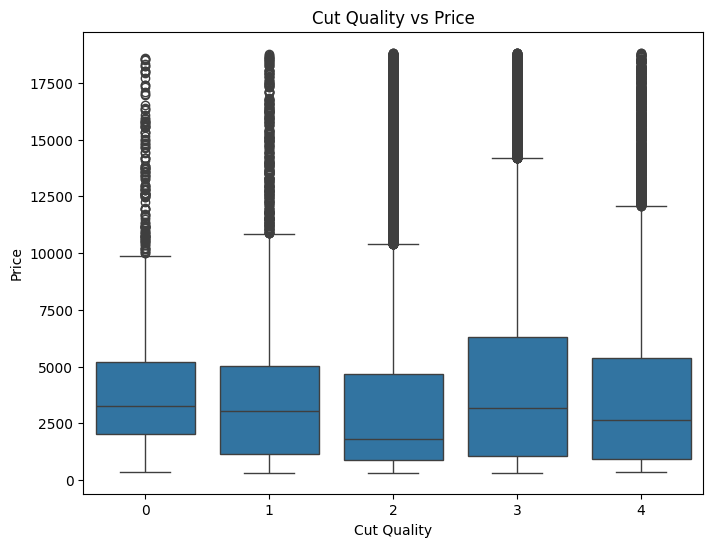

In [12]:
# Hypothesis 2: Cut Quality and Price Relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.title('Cut Quality vs Price')
plt.show()

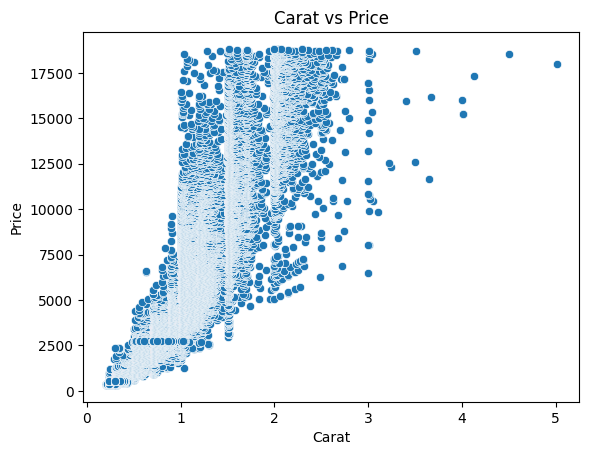

In [13]:
#Hypothesis - Diamonds with higher carat weight have higher prices
sns.scatterplot(x='carat', y='price', data=df)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')
plt.show()

### **IMPORTING ML LIBRARIES FOR REGRESSION**

In [14]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

CPU times: total: 109 ms
Wall time: 1.77 s


### **FEATURE SELECTION**

In [15]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
y = df['price']

### **TRAIN_TEST_SPLIT**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **MODEL BUILDING - REGRESSION**

In [17]:
models_regression = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

### **MODEL EVALUATION**

In [18]:
%%time
results_regression = {}
for name, model in models_regression.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results_regression[name] = rmse

CPU times: total: 8.53 s
Wall time: 26.5 s


### **DISPLAYING RESULTS**

In [19]:
print("Model Evaluation (RMSE) - Regression:")
for name, rmse in results_regression.items():
    print(f"{name}: {rmse}")

Model Evaluation (RMSE) - Regression:
Linear Regression: 1378.4023563672595
Ridge Regression: 1378.392518534873
Lasso Regression: 1378.347519386153
Random Forest Regressor: 554.5163317524173
Gradient Boosting Regressor: 664.3739735284533
Decision Tree Regressor: 715.3585875089175


> Among the regression models evaluated, Random Forest Regressor performs the best with the lowest RMSE of 559.12, indicating superior predictive accuracy compared to other models. However, all models exhibit relatively high RMSE values, suggesting potential limitations in capturing the complexity of the dataset. Further optimization or exploration of alternative approaches may be necessary to improve overall model performance.

### **VISULAIZING MODEL PERFORMANCE**

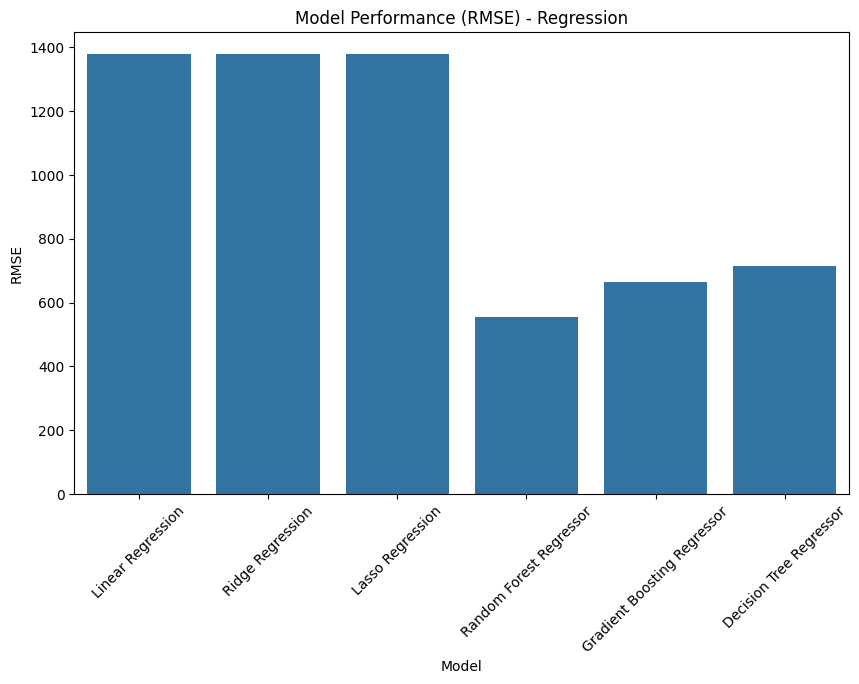

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results_regression.keys()), y=list(results_regression.values()))
plt.title('Model Performance (RMSE) - Regression')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

### **SAVE THE MODEL**

In [21]:
# save the model
import pickle
filename = 'Diomonds.pk1'
with open(filename, 'wb') as file:
    pickle.dump(df, file)